**Preprocesses**

**1. create the environment**

In [3]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV, LassoCV, Ridge
from sklearn import ensemble
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

**2. load the training data**

In [4]:
ames=pd.read_csv('ames_model_used.csv')

In [5]:
ames.shape

(1456, 55)

In [6]:
ames.columns

Index(['Unnamed: 0', 'MSZoning', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition_1', 'Condition_2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'RoofStyle', 'RoofMatl', 'Exterior_1st', 'Exterior_2nd', 'MasVnrType',
       'MasVnrArea', 'Foundation', 'BsmtExposure', 'BsmtFinType_1',
       'BsmtFinType_2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice', 'YearSinceRemod', 'TotBathrooms'],
      dtype='object')

In [7]:
ames.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
ames.shape

(1456, 54)

**3. Split data into test and train**

In [9]:
y=np.log(ames.SalePrice) 
features=ames.drop(['SalePrice'],axis=1) 
X=pd.get_dummies(features, drop_first=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = 42, test_size = 0.2)

In [11]:
X.shape
X_train.shape

(1164, 195)

**Models**

In [12]:
#define the evaluation function
def evaluate(model, test_features, test_labels, train_features, train_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('the goodness of fit r square for the train dateset is:',model.score(train_features, train_labels))
    print('the goodness of fit r square for the test dateset is:',r2_score(test_labels, predictions))
    print('the RMSE is: ', np.sqrt(mean_squared_error(test_labels, predictions)))

**1. Regression Models**

In [13]:
#create linear regression model
lm=linear_model.LinearRegression()
model=lm.fit(X_train, y_train)
evaluate(model,X_test, y_test, X_train, y_train)

Model Performance
Average Error: 0.1002 degrees.
Accuracy = 99.16%.
the goodness of fit r square for the train dateset is: 0.9342271849011923
the goodness of fit r square for the test dateset is: 0.7958213972545475
the RMSE is:  0.18087503731015586


**2. Regualization Models (Lasso and Ridge)**

**a) Lasso**

In [14]:
lasso = LassoCV(alphas = None, max_iter = 50000, cv = 10, normalize = True)
lasso.fit(X_train,y_train)
print('The Lasso lambda is:',lasso.alpha_)
evaluate(lasso,X_test, y_test, X_train, y_train)

The Lasso lambda is: 0.0001516747830969002
Model Performance
Average Error: 0.0907 degrees.
Accuracy = 99.24%.
the goodness of fit r square for the train dateset is: 0.8991662336651708
the goodness of fit r square for the test dateset is: 0.8976377012483706
the RMSE is:  0.1280688574714162


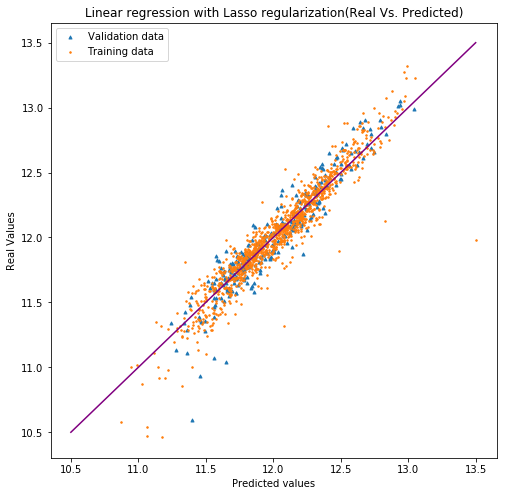

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(lasso.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(lasso.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Linear regression with Lasso regularization(Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

Lasso picked 78 features and eliminated the other 117 features


Text(0.5, 0, 'Coefficents')

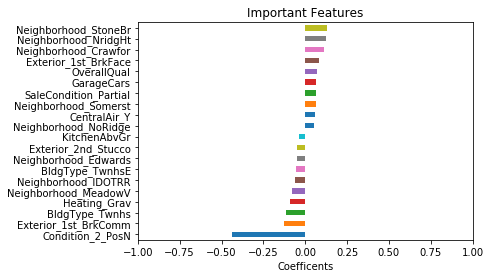

In [16]:
#plot feature importance (the magnitude of features in the regression funciton)
coefs = pd.Series(lasso.coef_, index = X_train.columns)
top_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
top_coefs.plot(kind = 'barh')
plt.title('Important Features')
plt.xlim(-1,1)
plt.xlabel('Coefficents')

In [17]:
#coefficient change with alpha
lasso = linear_model.Lasso(normalize=True)
alphas_lasso = np.logspace(-5, -1, 100)
coef_lasso = [] #going to get one coef_ value for each alpha
for i in alphas_lasso:
    lasso.set_params(alpha=i).fit(X_train,y_train)
    coef_lasso.append(lasso.coef_)

Text(0, 0.5, 'coefficients')

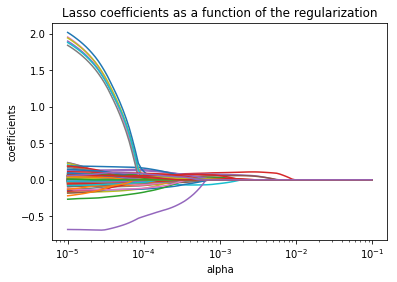

In [18]:
title = 'Lasso coefficients as a function of the regularization'
columns = X_train.columns
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
df_coef.plot(logx=True, title=title, legend=False)
plt.xlabel('alpha')
plt.ylabel('coefficients')

**b) Ridge**

In [19]:
alphas_ridge = np.logspace(-5, 2, 100)
ridge = RidgeCV(alphas = alphas_ridge, cv = 10, normalize = True)
ridge.fit(X_train,y_train)
print('The ridge lambda is:',ridge.alpha_)
evaluate(ridge,X_test, y_test, X_train, y_train)

The ridge lambda is: 0.3351602650938841
Model Performance
Average Error: 0.0982 degrees.
Accuracy = 99.18%.
the goodness of fit r square for the train dateset is: 0.9060586044448767
the goodness of fit r square for the test dateset is: 0.8797350483223987
the RMSE is:  0.1388171297662082


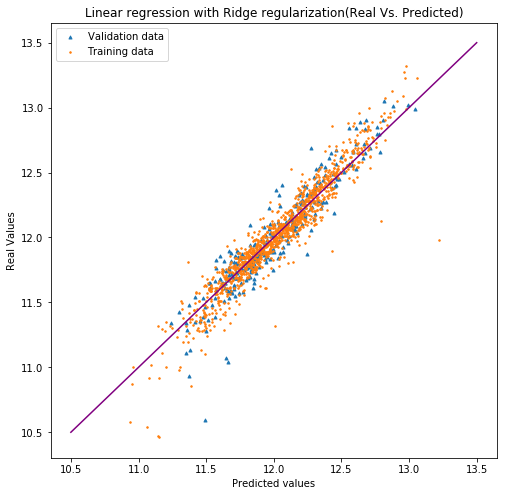

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(ridge.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(ridge.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Linear regression with Ridge regularization(Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

ridge picked 192 features and eliminated the other 3 features


Text(0.5, 0, 'Coefficents')

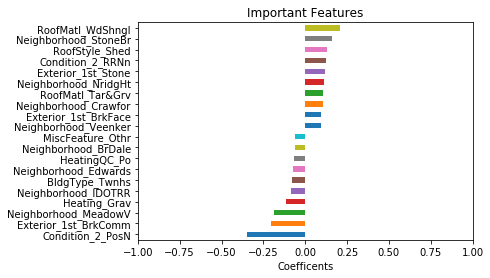

In [21]:
coefs = pd.Series(ridge.coef_, index = X_train.columns)
top_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print("ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
top_coefs.plot(kind = 'barh')
plt.title('Important Features')
plt.xlim(-1,1)
plt.xlabel('Coefficents')

In [22]:
#coefficient change with alpha
ridge = linear_model.Ridge(normalize=True)
alphas_ridge = np.logspace(-3, 3, 100)
coef_ridge = [] #going to get one coef_ value for each alpha
for i in alphas_ridge:
    ridge.set_params(alpha=i).fit(X_train,y_train)
    coef_ridge.append(ridge.coef_)

Text(0, 0.5, 'coefficients')

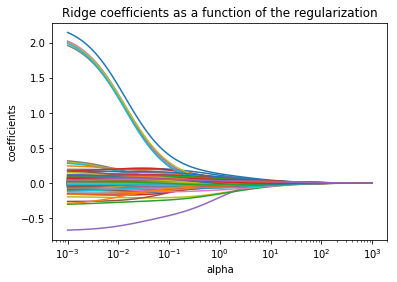

In [23]:
title = 'Ridge coefficients as a function of the regularization'
columns = X_train.columns
df_coef = pd.DataFrame(coef_ridge, index=alphas_ridge, columns=columns)
df_coef.plot(logx=True, title=title, legend=False)
plt.xlabel('alpha')
plt.ylabel('coefficients')

**b) ElasticNet**

In [24]:
elastic = ElasticNetCV(alphas = None, max_iter = 50000, cv = 10, normalize = True)
elastic.fit(X_train,y_train)
print('The elastic lambda is:',elastic.alpha_)
evaluate(elastic,X_test, y_test, X_train, y_train)

The elastic lambda is: 0.00028290482070791114
Model Performance
Average Error: 0.0930 degrees.
Accuracy = 99.22%.
the goodness of fit r square for the train dateset is: 0.8961265577298899
the goodness of fit r square for the test dateset is: 0.8913509428723521
the RMSE is:  0.13194304448408542


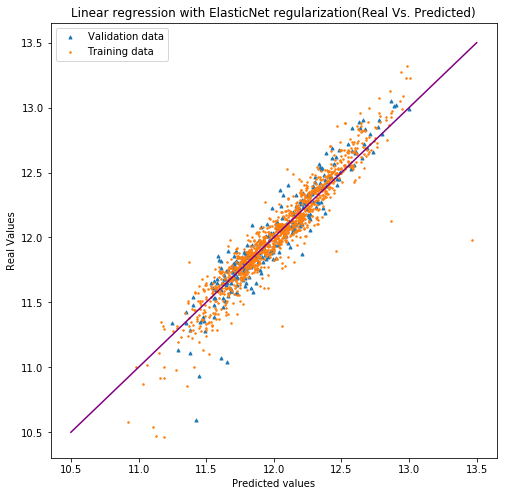

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(elastic.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(elastic.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Linear regression with ElasticNet regularization(Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

ElasticNet picked 90 features and eliminated the other 105 features


Text(0.5, 0, 'Coefficents')

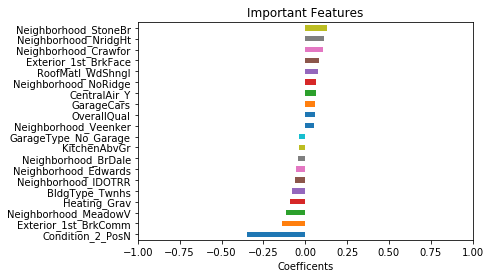

In [26]:
coefs = pd.Series(elastic.coef_, index = X_train.columns)
top_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
top_coefs.plot(kind = 'barh')
plt.title('Important Features')
plt.xlim(-1,1)
plt.xlabel('Coefficents')

In [27]:
#coefficient change with alpha
elastic = linear_model.ElasticNet(normalize=True)
alphas_elastic = np.logspace(-5, -1, 100)
coef_elastic = [] #going to get one coef_ value for each alpha
for i in alphas_elastic:
    elastic.set_params(alpha=i).fit(X_train,y_train)
    coef_elastic.append(elastic.coef_)

Text(0, 0.5, 'coefficients')

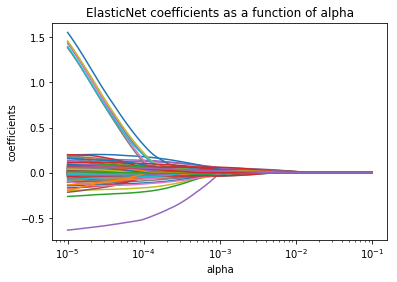

In [28]:
title = 'ElasticNet coefficients as a function of alpha'
columns = X_train.columns
df_coef = pd.DataFrame(coef_elastic, index=alphas_elastic, columns=columns)
df_coef.plot(logx=True, title=title, legend=False)
plt.xlabel('alpha')
plt.ylabel('coefficients')

**3. Tree models**

**a) Random Forest**

In [29]:
base_model = ensemble.RandomForestRegressor(n_estimators = 100, random_state = 42, max_features=
                                           150, max_depth=25)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 0.0929 degrees.
Accuracy = 99.22%.
the goodness of fit r square for the train dateset is: 0.9824628941081899
the goodness of fit r square for the test dateset is: 0.8814122625279569
the RMSE is:  0.13784575981773314


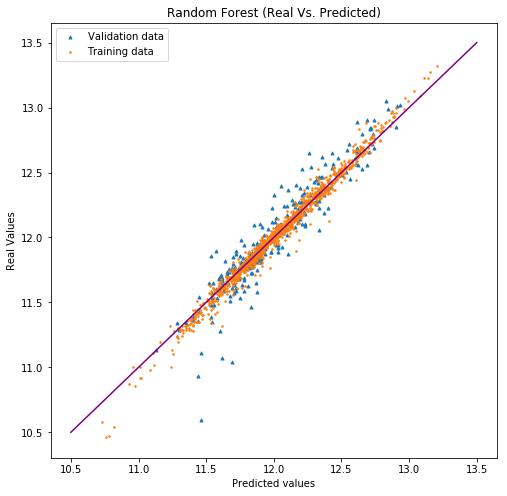

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(base_model.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(base_model.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Random Forest (Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

Text(0, 0.5, 'Features')

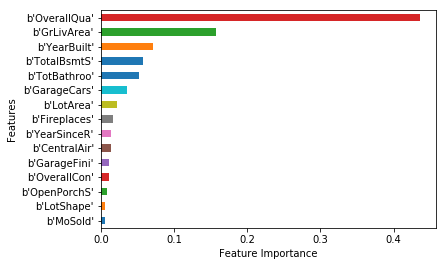

In [31]:
feature_importance_base = list(zip(X.columns, base_model.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance_base = np.array(feature_importance_base, dtype=dtype)
feature_sort_base = np.sort(feature_importance_base, order='importance')[::-1]
name, score = zip(*list(feature_sort_base))
pd.DataFrame({'name':name,'score':score})[:15].sort_values('score').plot.barh(x='name', y='score', legend=None)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

In [32]:
randomForest=ensemble.RandomForestRegressor()
n_trees_range = range(30, 200, 10)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
    randomForest.set_params(n_estimators=n_trees, random_state=42, oob_score=True)
    randomForest.fit(X_train, y_train)
    train_error2.append(1 - randomForest.score(X_train, y_train))
    test_error2.append(1 - randomForest.score(X_test, y_test))
    oob_error.append(1 - randomForest.oob_score_)

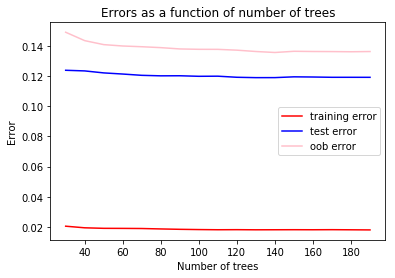

In [33]:
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.title('Errors as a function of number of trees')
plt.legend()
plt.show()

**b) XGboost**

In [34]:
model = XGBRegressor(learning_rate=0.08, max_depth=4, n_estimators=298)
model.fit(X_train,y_train)
XGboost_accuracy = evaluate(model, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 0.0823 degrees.
Accuracy = 99.31%.
the goodness of fit r square for the train dateset is: 0.9864963897720215
the goodness of fit r square for the test dateset is: 0.9020464806850019
the RMSE is:  0.1252805184695707


In [35]:
model = XGBRegressor(learning_rate=0.08, max_depth=4, n_estimators=298)
model.fit(X_train,y_train)
preds = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

0.1252805184695707

Text(0, 0.5, 'Feature')

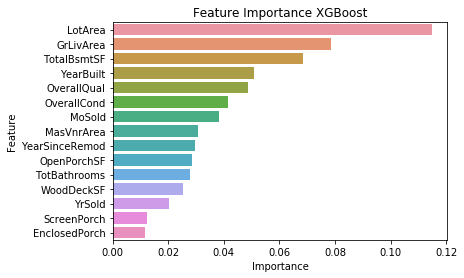

In [36]:
imp = pd.DataFrame({'Variable':X_train.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Variable', data=imp.head(15))
plt.title('Feature Importance XGBoost')
plt.ylabel('Feature')

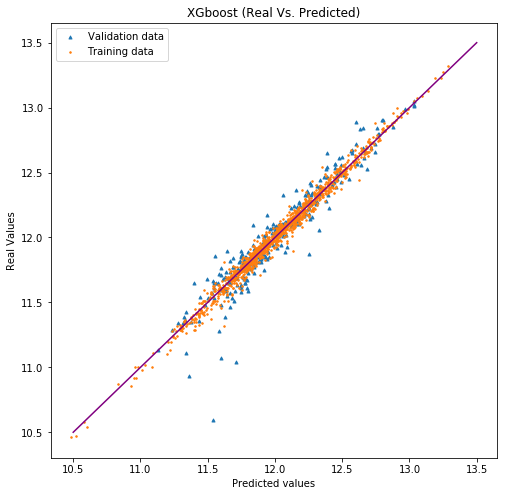

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(model.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(model.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("XGboost (Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

**4. KNN**

In [38]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
Kmodel = KNeighborsRegressor(algorithm='auto', leaf_size=15, n_neighbors=4, p=1, weights='distance')
Kmodel.fit(rescaledX, y_train)
XGboost_accuracy = evaluate(Kmodel, X_test, y_test, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


Model Performance
Average Error: 0.4229 degrees.
Accuracy = 96.41%.
the goodness of fit r square for the train dateset is: -0.6486894188705452
the goodness of fit r square for the test dateset is: -0.5694713298445362
the RMSE is:  0.5014760695512955


**5. attempt at stacking**

In [39]:
#first model
model1 = XGBRegressor(learning_rate=0.08, max_depth=4, n_estimators=298)


model1.fit(X_train, y_train)

test_pred1 = model1.predict(X_test)
train_pred1 = model1.predict(X_train)


train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [40]:
#second model
model2 = ensemble.RandomForestRegressor(bootstrap=True,
criterion='mse',
max_depth= None,
max_features= 'auto',
max_leaf_nodes= None,
min_impurity_decrease= 0.0,
min_impurity_split= None,
min_samples_leaf= 1,
min_samples_split= 2,
min_weight_fraction_leaf= 0.0,
n_estimators= 100,
n_jobs= 1,
oob_score= False,
random_state= 42,
verbose= 0,
warm_start= False)
model2.fit(X_train, y_train)

test_pred2 = model2.predict(X_test)
train_pred2 = model2.predict(X_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [41]:
#stacking model1 and model2 and then using Ridge to train on results of previous two models
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = Ridge(random_state=42)
model.fit(df,y_train)
model.score(df_test, y_test)
preds = model.predict(df_test)
np.sqrt(mean_squared_error(y_test, preds))

0.1253014541813015